# Consumir un recurso

In [31]:
import requests
import pandas as pd
%matplotlib inline

In [32]:
r = requests.get("https://graphs2.coinmarketcap.com/currencies/ethereum/")

In [33]:
bitcoin_data = r.json()

In [34]:
bitcoin_data.keys()

dict_keys(['market_cap_by_available_supply', 'price_btc', 'price_usd', 'volume_usd'])

In [35]:
bitcoin_data["price_usd"][0:5]

[[1438958970000, 2.83162],
 [1439045372000, 1.33075],
 [1439131770000, 0.718413],
 [1439218169000, 0.643769],
 [1439304572000, 0.75046]]

In [36]:
bitcoin_df = pd.DataFrame(bitcoin_data["price_usd"], columns = ["date", "value"])

In [37]:
bitcoin_df.head(5)

,date,value
0,1438958970000,2.831620
1,1439045372000,1.330750
2,1439131770000,0.718413
3,1439218169000,0.643769
4,1439304572000,0.750460


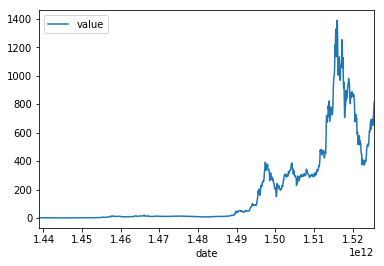

In [38]:
bitcoin_df.plot(kind="line", x="date", y="value")

# Segunda fuente de información

In [39]:
aapl_source  = pd.read_html("https://www.nasdaq.com/symbol/aapl/historical")

In [40]:
aapl_source[2].head()

,Date,Open,"High ""High"" is the highest sales price the stock has achieved during the regular trading hours, the intra-day high.","Low ""Low"" is the lowest sales price the stock has fallen to during the regular trading hours, the intra-day low.","Close / Last ""Close"" is the period at the end of the trading session. Sometimes used to refer to closing price.","Volume ""Volume"" The closing daily official volumes represented graphically for each trading day."
0,NaN,NaN,NaN,NaN,NaN,NaN
1,05/04/2018,178.250,184.25,178.1700,183.83,56137230.0
2,05/03/2018,175.880,177.50,174.4411,176.89,33944110.0
3,05/02/2018,175.225,177.75,173.8000,176.57,66454720.0
4,05/01/2018,166.410,169.20,165.2700,169.10,52228910.0


In [42]:
aapl_daily_data = aapl_source[2].dropna()
aapl_daily_data.columns = ["date", "open", "high", "low", "close", "volume"]

In [43]:
aapl_daily_data.head(5)

,date,open,high,low,close,volume
1,05/04/2018,178.250,184.25,178.1700,183.83,56137230.0
2,05/03/2018,175.880,177.50,174.4411,176.89,33944110.0
3,05/02/2018,175.225,177.75,173.8000,176.57,66454720.0
4,05/01/2018,166.410,169.20,165.2700,169.10,52228910.0
5,04/30/2018,162.130,167.26,161.8400,165.26,41976500.0


# Cruzando las dos fuentes

lo haremos sobre la fecha

In [44]:
import datetime

In [45]:
def convert_timestamp_to_date(unix_time):
    return datetime.datetime.fromtimestamp(
            int(str(unix_time)[0:10])
        ).strftime('%m/%d/%Y')

In [46]:
    bitcoin_df["date"] = bitcoin_df["date"].apply(lambda x: convert_timestamp_to_date(x))

In [ ]:
modified_date = []
for value in bitcoin_df["date"]:
    modified_date.append(convert_timestamp_to_date(value))
bitcoin_df["date"] =  modified_date
bitcoin_df.head()

In [81]:
merged_tables = aapl_daily_data.merge(bitcoin_df, on="date",how="right")

In [82]:
merged_tables.head(5)

,date,open,high,low,close,volume,value
0,05/04/2018,178.250,184.25,178.1700,183.83,56137230.0,800.467
1,05/03/2018,175.880,177.50,174.4411,176.89,33944110.0,770.148
2,05/02/2018,175.225,177.75,173.8000,176.57,66454720.0,713.665
3,05/01/2018,166.410,169.20,165.2700,169.10,52228910.0,668.522
4,04/30/2018,162.130,167.26,161.8400,165.26,41976500.0,650.500


In [83]:
len(merged_tables)

1001

In [84]:
len(merged_tables.dropna())

63

In [85]:
cleaned_merged_tables = merged_tables.dropna()

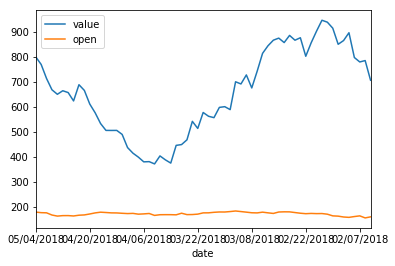

In [86]:
%matplotlib inline
cleaned_merged_tables.plot(kind="line", x="date", y=["value", "open"])